Top 10 predicted wines with highest points and lowest price:
Title: Lava Cap 2013 Estate Bottled Cabernet Sauvignon (El Dorado)
Points: 90
Price: 26.0
Wine Type: red
--------
Title: Ded.Reckoning 2013 No. 12 Reserve Red (Red Mountain)
Points: 89
Price: 40.0
Wine Type: red
--------
Title: HandCraft 2014 Artisan Collection Chardonnay (California)
Points: 86
Price: 10.0
Wine Type: white
--------
Title: Le Vigne 2014 Nikiara Red (Paso Robles)
Points: 88
Price: 45.0
Wine Type: red
--------
Title: Amador Cellars 2013 Cooper & Karmere Vineyards Barbera (Amador County)
Points: 90
Price: 32.0
Wine Type: red
--------
Title: Von Strasser 2012 Estate Cabernet Sauvignon (Diamond Mountain District)
Points: 90
Price: 80.0
Wine Type: red
--------
Title: Krutz 2013 Magnolia Inspiration Vineyard Chardonnay (Russian River Valley)
Points: 90
Price: 20.0
Wine Type: white
--------
Title: La Crema 2015 Kelli Ann Vineyard Chardonnay (Russian River Valley)
Points: 91
Price: 40.0
Wine Type: white
--------
Title

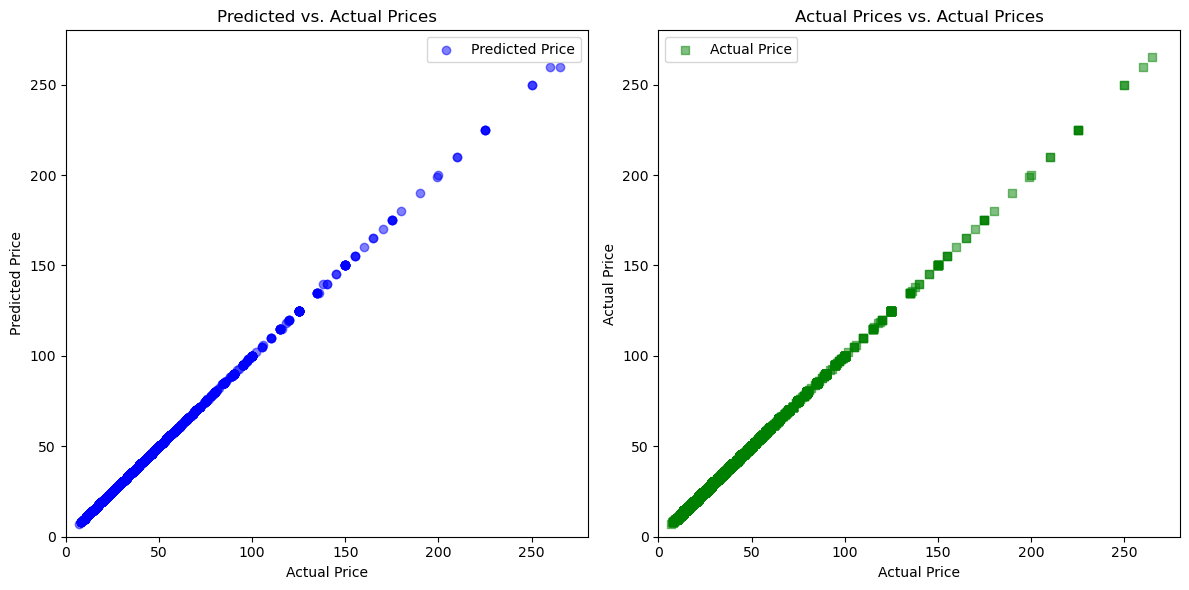

In [2]:
# GradientBoost 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load the historical data
data = pd.read_csv("C:/Users/nigan/cleaned_wine_data.csv")

# Drop rows with NaN values in the features and target
data_cleaned = data.dropna()

# Define features and target
features = ['points', 'price']  
target = 'price' 

# Separate features (X) and (y)
X = data_cleaned[features]
y = data_cleaned[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=500, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the price on the test data
y_pred = model.predict(X_test)

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)

# Find the indices of the top 10 predictions
top_10_indices = np.argsort(y_pred)[:10]

print("Top 10 predicted wines with highest points and lowest price:")
for index in top_10_indices:
    predicted_wine = data_cleaned.iloc[index]
    print("Title:", predicted_wine['title'])
    print("Points:", predicted_wine['points'])
    print("Price:", predicted_wine['price'])
    print("Wine Type:", predicted_wine['wine_type'])
    print("--------")

print("R-squared:", r2)

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the predicted vs. actual prices for both scatterplots
scatter1 = axs[0].scatter(y_test, y_pred, alpha=0.5, label='Predicted Price', color='blue', marker='o')
axs[0].set_xlabel('Actual Price')
axs[0].set_ylabel('Predicted Price')
axs[0].set_title('Predicted vs. Actual Prices')
axs[0].set_xlim(0, 280)
axs[0].set_ylim(0, 280)
axs[0].legend()

scatter2 = axs[1].scatter(y_test, y_test, alpha=0.5, label='Actual Price', color='green', marker='s')
axs[1].set_xlabel('Actual Price')
axs[1].set_ylabel('Actual Price')
axs[1].set_title('Actual Prices vs. Actual Prices')
axs[1].set_xlim(0, 280)
axs[1].set_ylim(0, 280)
axs[1].legend()

plt.tight_layout()
plt.show()

Available keys in evals_result: dict_keys(['learn', 'validation'])


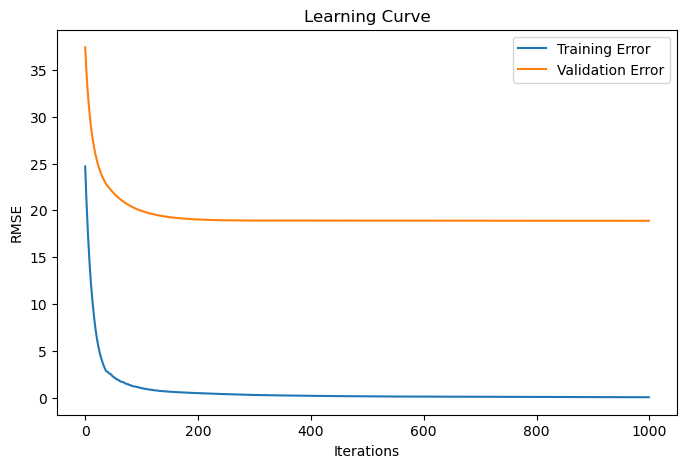

Top 10 predicted wines with highest points and lowest price:
Title: Lava Cap 2013 Estate Bottled Cabernet Sauvignon (El Dorado)
Points: 90
Price: 26.0
Wine Type: red
--------
Title: Piña 2012 Buckeye Vineyard Cabernet Sauvignon (Howell Mountain)
Points: 92
Price: 85.0
Wine Type: red
--------
Title: Le Vigne 2014 Nikiara Red (Paso Robles)
Points: 88
Price: 45.0
Wine Type: red
--------
Title: Von Strasser 2012 Estate Cabernet Sauvignon (Diamond Mountain District)
Points: 90
Price: 80.0
Wine Type: red
--------
Title: Alpha Omega 2012 Beckstoffer Las Piedras Cabernet Sauvignon (St. Helena)
Points: 98
Price: 250.0
Wine Type: red
--------
Title: Steven Kent 2010 Home Ranch Vineyard Cabernet Sauvignon (Livermore Valley)
Points: 87
Price: 65.0
Wine Type: red
--------
Title: HandCraft 2014 Artisan Collection Chardonnay (California)
Points: 86
Price: 10.0
Wine Type: white
--------
Title: Krutz 2013 Magnolia Inspiration Vineyard Chardonnay (Russian River Valley)
Points: 90
Price: 20.0
Wine Type: 

In [4]:
# CatBoost 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load the historical data
data = pd.read_csv("C:/Users/nigan/cleaned_wine_data.csv")

# Drop rows with NaN values in the features and target
data_cleaned = data.dropna()

# Define features and target
features = ['points', 'price']  
target = 'price' 

# Separate features (X) and (y)
X = data_cleaned[features]
y = data_cleaned[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CatBoost model
model = CatBoostRegressor(iterations=1000, random_seed=42, verbose=0)

# Fit the model on the training data
model.fit(X_train, y_train, eval_set=(X_test, y_test))

# Predict the price on the test data
y_pred = model.predict(X_test)

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)

# Print the available keys in evals_result
print("Available keys in evals_result:", model.get_evals_result().keys())

# Use the appropriate key for the learning curve
train_errors = model.get_evals_result()['learn']['RMSE']
test_errors = model.get_evals_result()['validation']['RMSE']

# Plot learning curve
plt.figure(figsize=(8, 5))
plt.plot(train_errors, label='Training Error')
plt.plot(test_errors, label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Learning Curve')
plt.legend()
plt.show()

# Find the indices of the top 10 predictions
top_10_indices = np.argsort(y_pred)[:10]

print("Top 10 predicted wines with highest points and lowest price:")
for index in top_10_indices:
    predicted_wine = data_cleaned.iloc[index]
    print("Title:", predicted_wine['title'])
    print("Points:", predicted_wine['points'])
    print("Price:", predicted_wine['price'])
    print("Wine Type:", predicted_wine['wine_type'])
    print("--------")

print("R-squared:", r2)


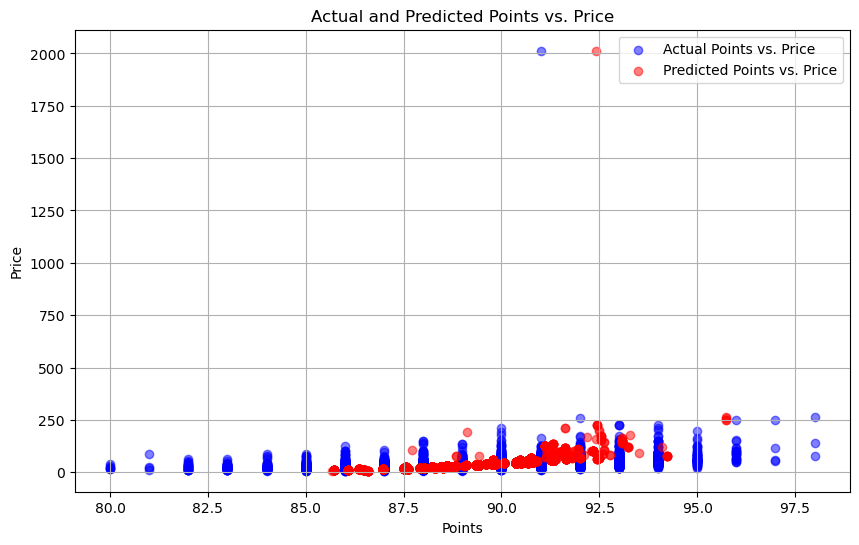

R-squared (Stacked Model): 0.25606992855003485


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the historical data
data = pd.read_csv("C:/Users/nigan/cleaned_wine_data.csv")

# Drop rows with NaN values in the features and target
data_cleaned = data.dropna()

# Define features and target
features = ['price']  
target = 'points'

# Separate features (X) and (y)
X = data_cleaned[features]
y = data_cleaned[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create base models
catboost_model = CatBoostRegressor(iterations=1000, random_seed=42, verbose=0)
gradientboost_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Create a stacking model using base models
stacked_model = StackingRegressor(
    estimators=[('catboost', catboost_model), ('gb', gradientboost_model)],
    final_estimator=CatBoostRegressor(iterations=1000, random_seed=42, verbose=0)
)

# Fit the stacking model on the training data
stacked_model.fit(X_train, y_train)

# Predict points on the test data using the stacking model
y_pred_stacked = stacked_model.predict(X_test)

# Calculate R-squared value for the stacking model
r2_stacked = r2_score(y_test, y_pred_stacked)

# Create a combined scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, X_test['price'], color='blue', alpha=0.5, label='Actual Points vs. Price')
plt.scatter(y_pred_stacked, X_test['price'], color='red', alpha=0.5, label='Predicted Points vs. Price')
plt.xlabel('Points')
plt.ylabel('Price')
plt.title('Actual and Predicted Points vs. Price')
plt.legend()
plt.grid(True)
plt.show()

# Print R-squared value
print("R-squared (Stacked Model):", r2_stacked)
